In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
dataset_path = 'C:\\Users\\yerra\\Downloads\\USvideos.csv' 
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                    

In [2]:
# Check the shape of the dataframe
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (40949, 16)


In [3]:
# Drop duplicates
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

Shape after dropping duplicates: (40901, 16)


In [4]:
# Display summary statistics
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
        category_id         views         likes      dislikes  comment_count
count  40901.000000  4.090100e+04  4.090100e+04  4.090100e+04   4.090100e+04
mean      19.970588  2.360678e+06  7.427173e+04  3.711722e+03   8.448567e+03
std        7.569362  7.397719e+06  2.289999e+05  2.904624e+04   3.745139e+04
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  2.419720e+05  5.416000e+03  2.020000e+02   6.130000e+02
50%       24.000000  6.810640e+05  1.806900e+04  6.300000e+02   1.855000e+03
75%       25.000000  1.821926e+06  5.533800e+04  1.936000e+03   5.752000e+03
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06


In [5]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())



Missing values in the dataset:
video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               569
dtype: int64


In [6]:
# Remove unnecessary columns
columns_to_remove = ['thumbnail_link', 'description']
df = df.drop(columns=columns_to_remove)
print("\nDataframe info after removing columns:")
df.info()



Dataframe info after removing columns:
<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  comments_disabled       40901 non-null  bool  
 12  ratings_disabled        40901 non-null  bool  
 13  video_error_or_removed  40901 non-null  bool  
dtypes: bool(3), int64(5

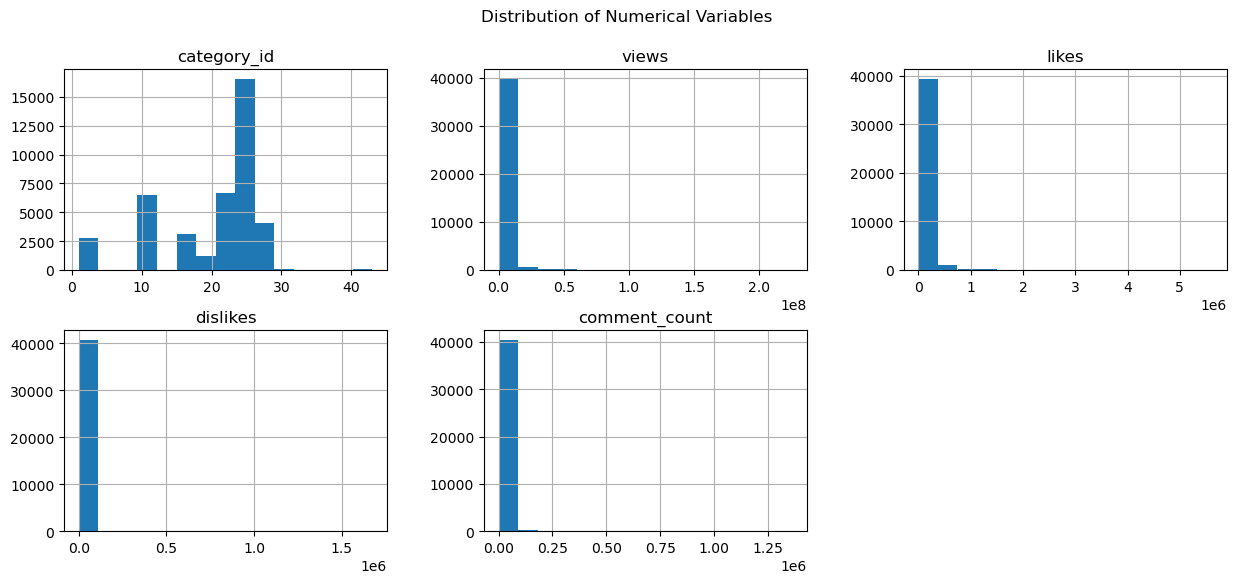

In [18]:
# Visualize the distribution of numerical variables
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(2, -1))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

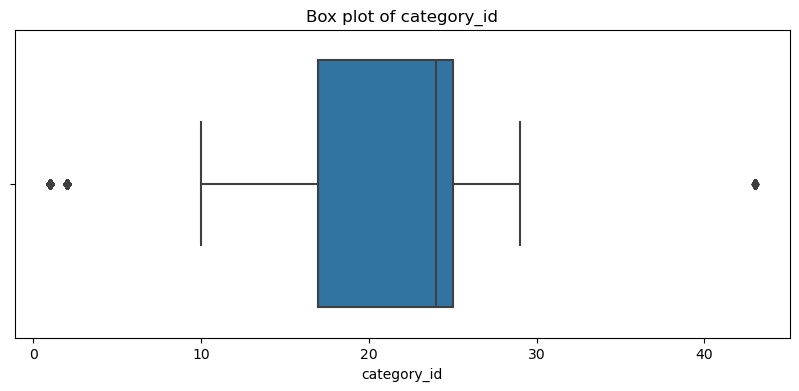

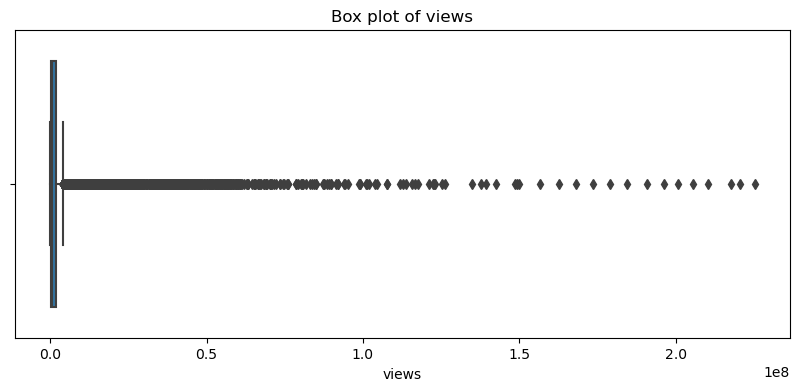

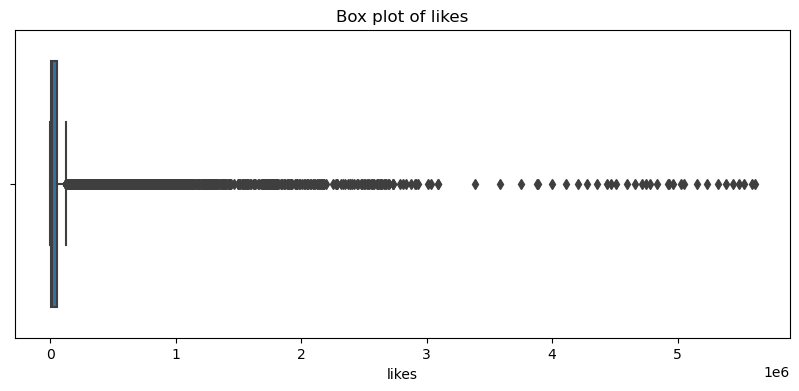

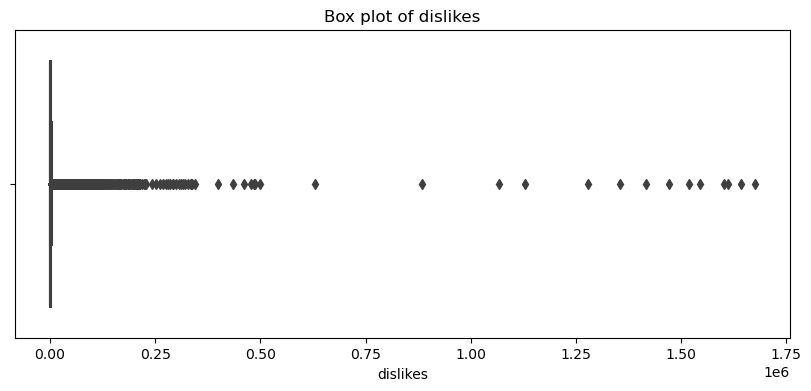

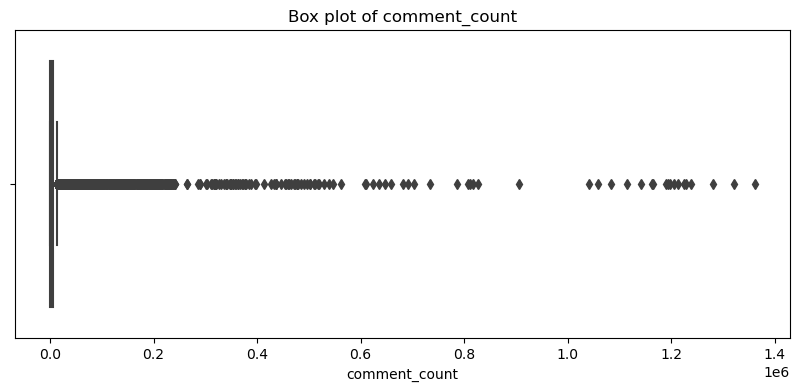

In [19]:
# Detect outliers using box plots
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [9]:
# Calculate the correlation matrix
#corr_matrix = df.corr()
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
corr_matrix = numeric_df.corr()



In [10]:
# Display the correlation matrix
print("\nCorrelation matrix:")
print(corr_matrix)


Correlation matrix:
               category_id     views     likes  dislikes  comment_count
category_id       1.000000 -0.168243 -0.173946 -0.033583      -0.076365
views            -0.168243  1.000000  0.849179  0.472216       0.617657
likes            -0.173946  0.849179  1.000000  0.447188       0.803088
dislikes         -0.033583  0.472216  0.447188  1.000000       0.700192
comment_count    -0.076365  0.617657  0.803088  0.700192       1.000000


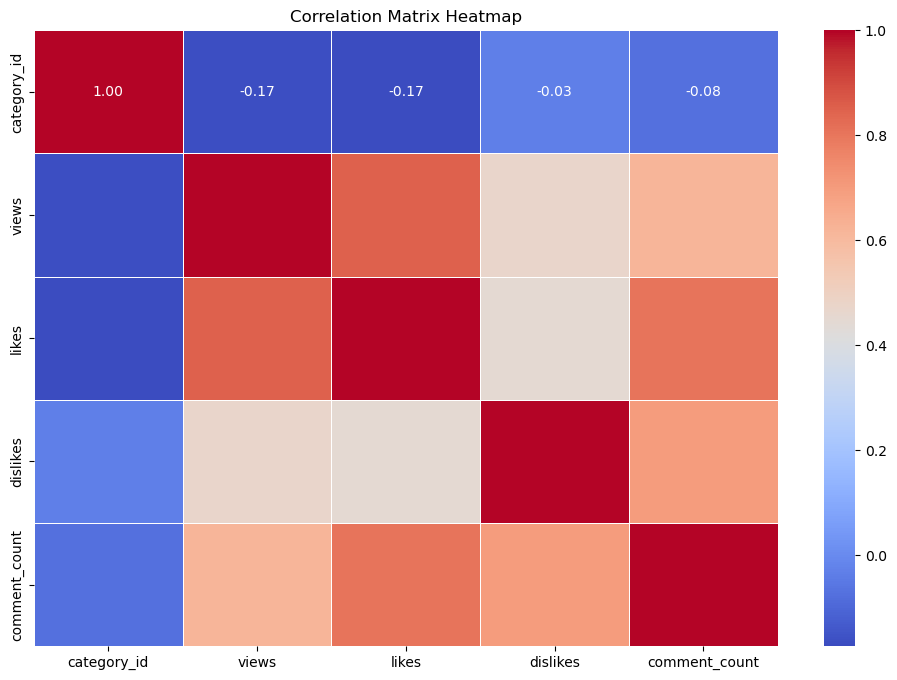

In [11]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

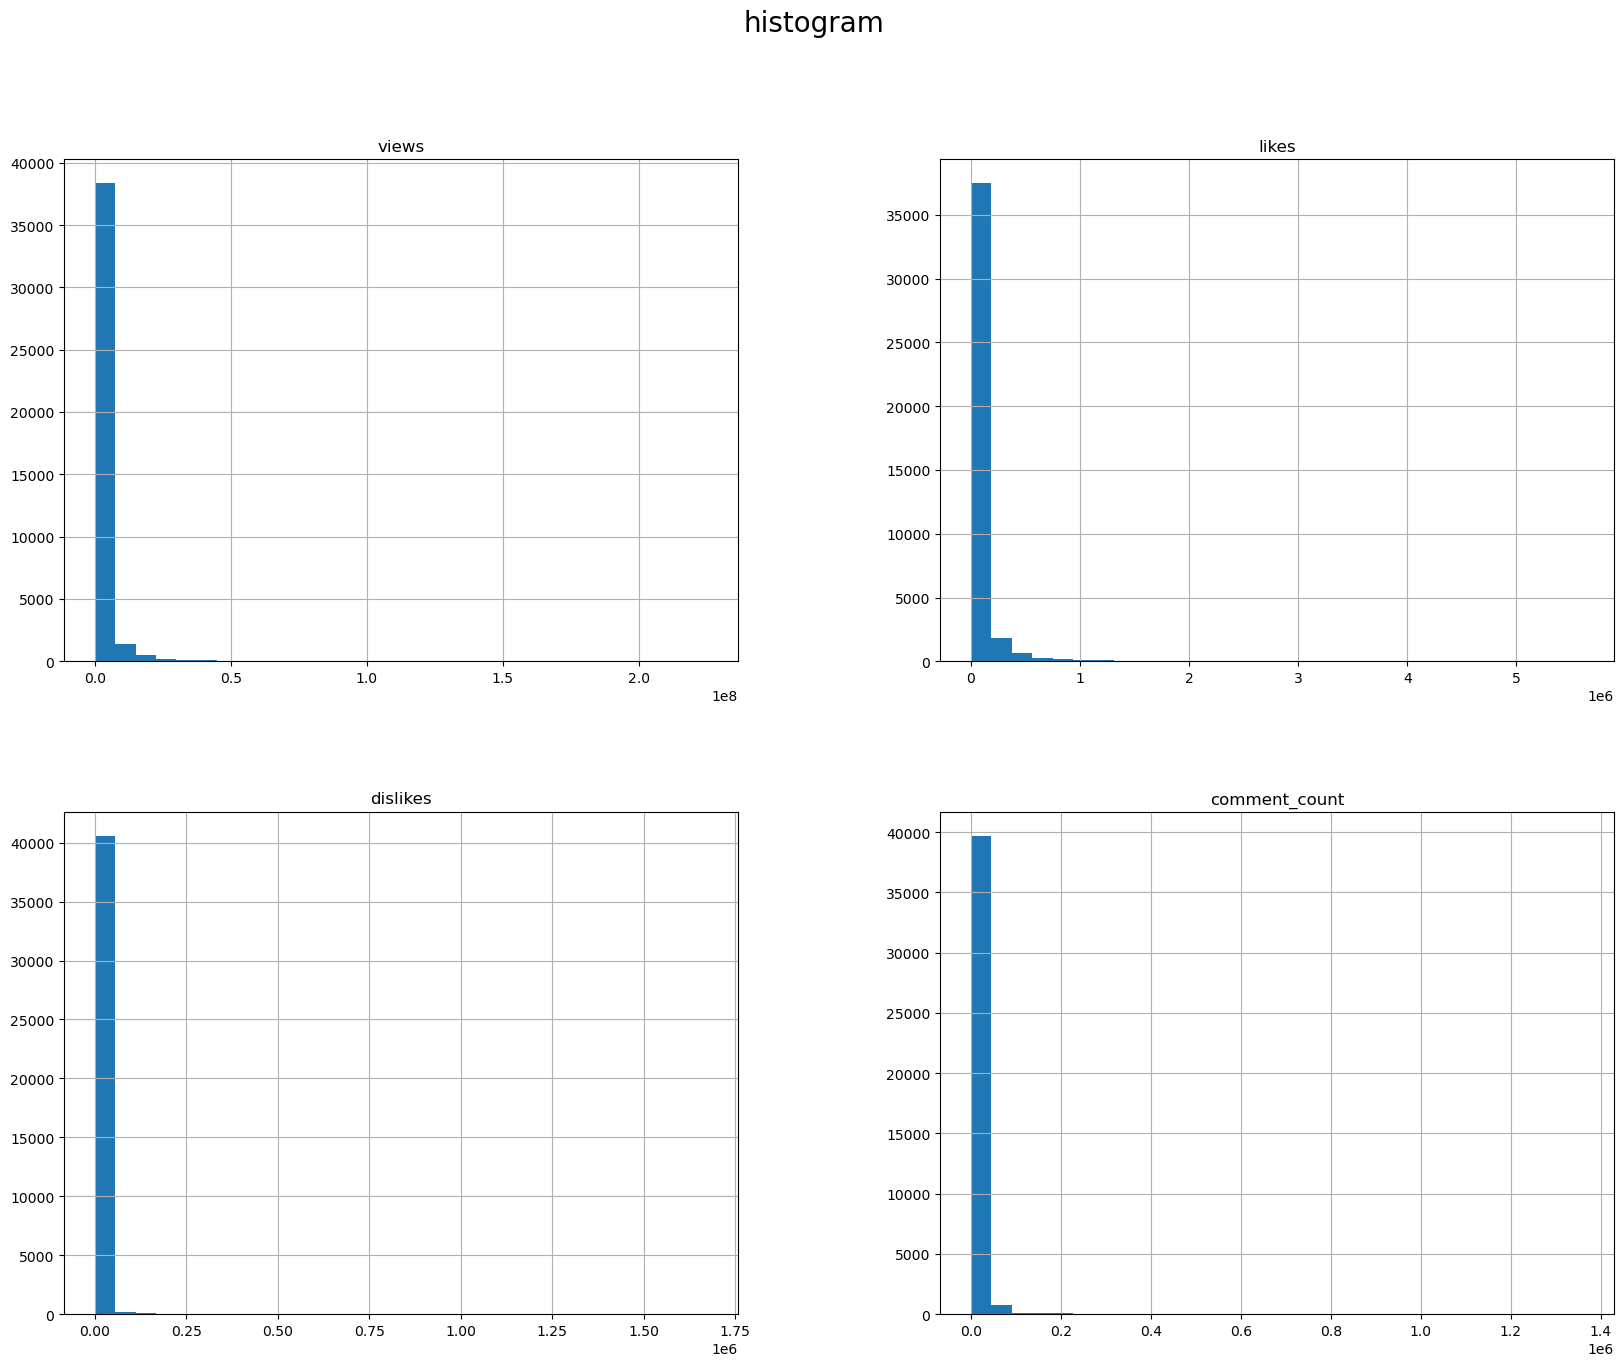

In [12]:
# Distribution of numerical variables: Histograms
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']
df[numerical_columns].hist(bins=30, figsize=(20, 15))
plt.suptitle('histogram', fontsize=20)
plt.show()


In [16]:
# Scatter plots for top correlated pairs
top_correlations = corr_matrix.unstack().sort_values(ascending=False)
# Select the top 10 correlation pairs (excluding self-correlation)
top_pairs = top_correlations[(top_correlations != 1) & (top_correlations != -1)].head(10)



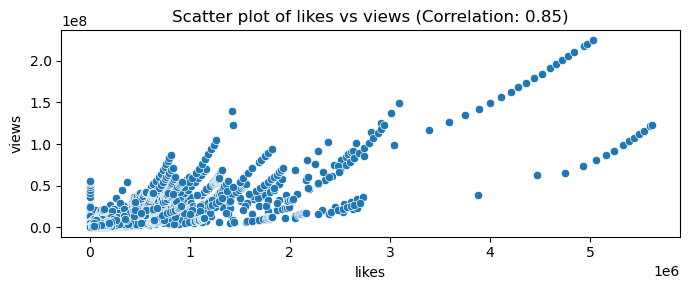

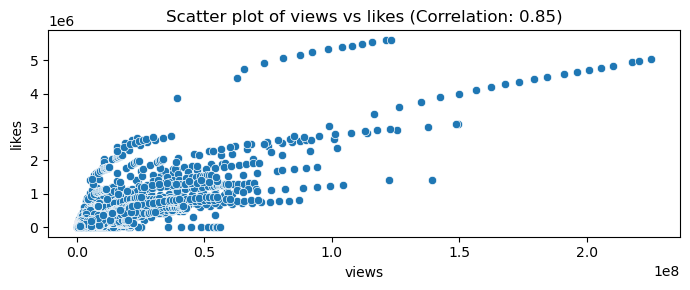

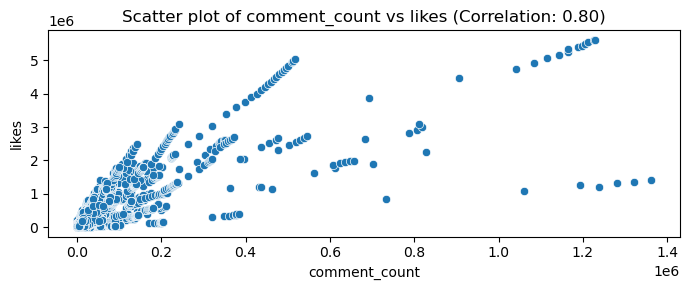

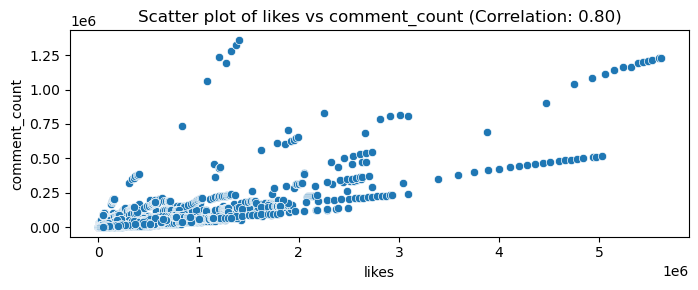

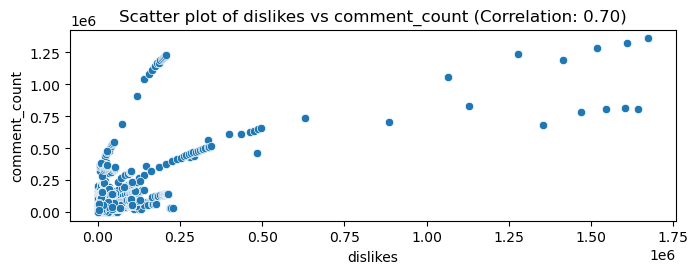

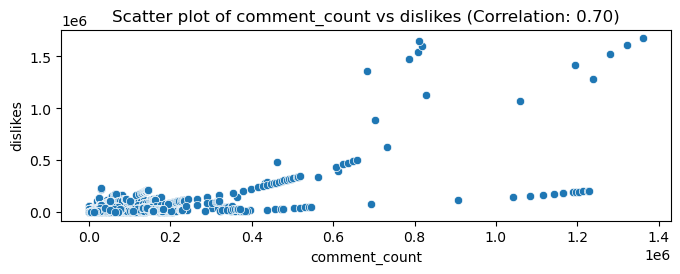

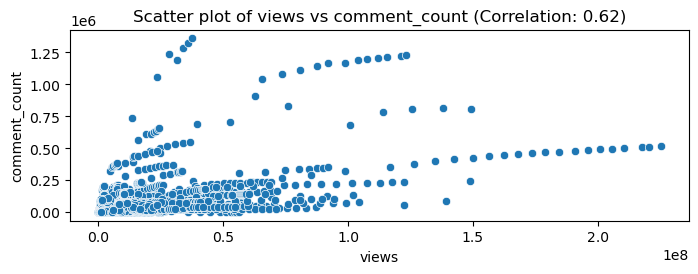

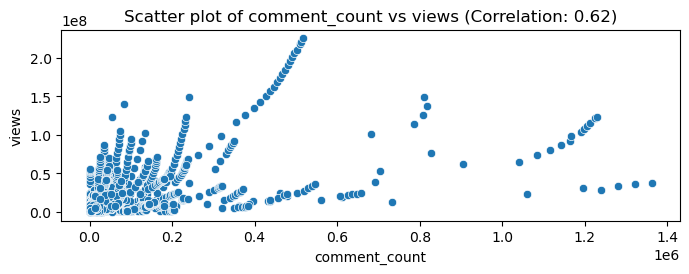

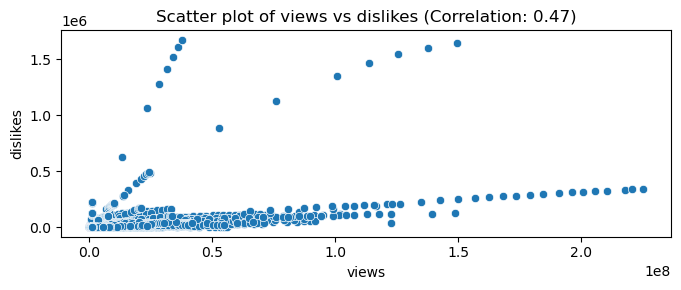

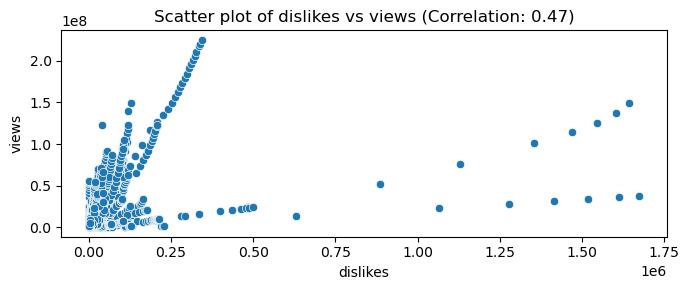

In [17]:
# Plot each scatter plot separately
for i, (pair, corr) in enumerate(top_pairs.items()):
    col1, col2 = pair
    plt.figure(figsize=(7, 3))
    sns.scatterplot(data=df, x=col1, y=col2)
    plt.title(f'Scatter plot of {col1} vs {col2} (Correlation: {corr:.2f})')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.show()